## What is Ridge Regression?

### Ridge Regression (also called L2 regularization or Tikhonov regularization) is a regularized version of Linear Regression that adds a penalty term to prevent overfitting by keeping the model weights as small as possible.


### The Cost Function

The key difference from ordinary Linear Regression is the cost function:

- **Ordinary Linear Regression**
- `Cost = MSE(θ)`

- **Ridge Regression**
- `Cost = MSE(θ) + α × ½ × ∑(θᵢ²)   for i = 1 to n`

- Where:

  - MSE(θ): Mean Squared Error (measures how well the model fits the data)
  - α (alpha): Regularization strength (hyperparameter you control)
  - ∑(θᵢ²): Sum of squared weights (penalty term that keeps weights small)

- **Important**: The bias term θ₀ is not regularized (the sum starts from i=1, not i=0)

### Why the Penalty Term Works

The pentalty term `α × ½ × ∑(θᵢ²)` encourages the model to:

1. Keep weights small: Large weights are penalized heavily
2. Distuibute importance: Prefers many small weights rather than a few large ones
3. Reduce overfitting: Prevent the model from fitting noise in the data

### The α Parameter: Controlling Regularization Strength

- α = 0: No regularization → Ridge Regression becomes ordinary Linear Regression
- α → ∞: All weights approach zero → Model becomes a flat line through the mean
- 0 < α < ∞: Balance between fitting data and keeping weights small


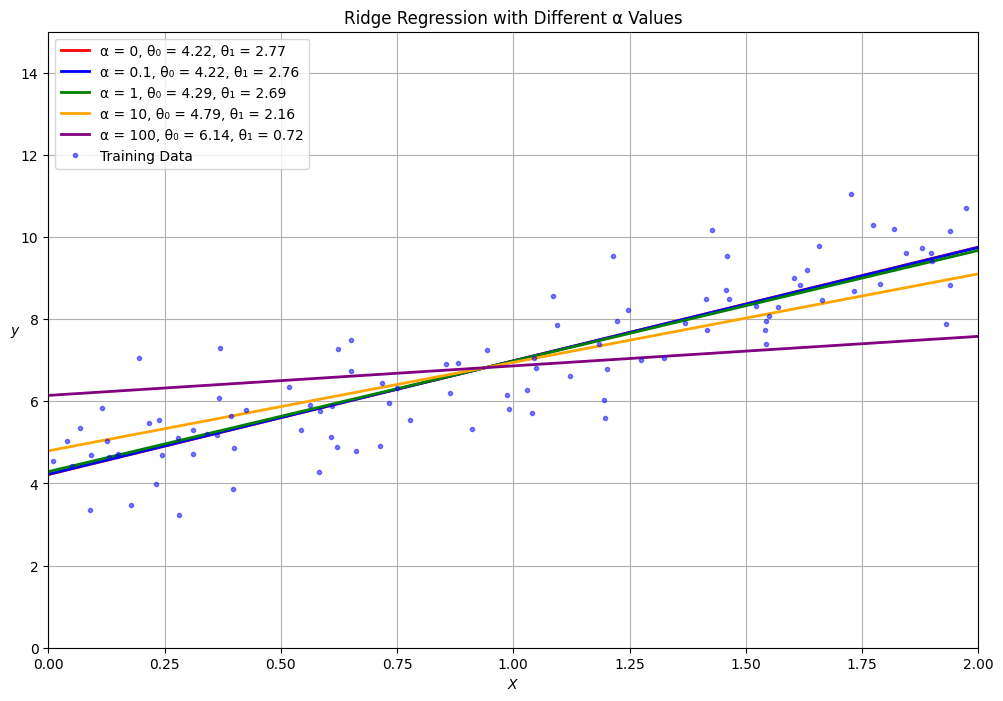

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# create ridge regression models with different alpha values
alphas = [0, 0.1, 1, 10, 100]
colors = ["red", "blue", "green", "orange", "purple"]

plt.figure(figsize=(12, 8))

for alpha, color in zip(alphas, colors):
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X, y)

    # make predictions
    X_new = np.linspace(0, 2, 100).reshape(-1, 1)
    y_new = ridge_reg.predict(X_new)

    plt.plot(
        X_new,
        y_new,
        color,
        linewidth=2,
        label=f"α = {alpha}, θ₀ = {ridge_reg.intercept_[0]:.2f}, "
        f"θ₁ = {ridge_reg.coef_[0]:.2f}",
    )

plt.plot(X, y, "b.", alpha=0.5, label="Training Data")
plt.xlabel("$X$")
plt.ylabel("$y$", rotation=0)
plt.title("Ridge Regression with Different α Values")
plt.legend(loc="upper left")
plt.grid(True)
plt.axis([0, 2, 0, 15])
plt.show()

What you'll observe

- α = 0: Same as Linear Regression (θ₀ ≈ 4.22, θ₁ ≈ 2.77)
- α = 0.1: Slightly smaller weights
- α = 1: Noticeably smaller weights
- α = 10: Much smaller weights (flatter line)
- α = 100: Very small weights (almost flat line)


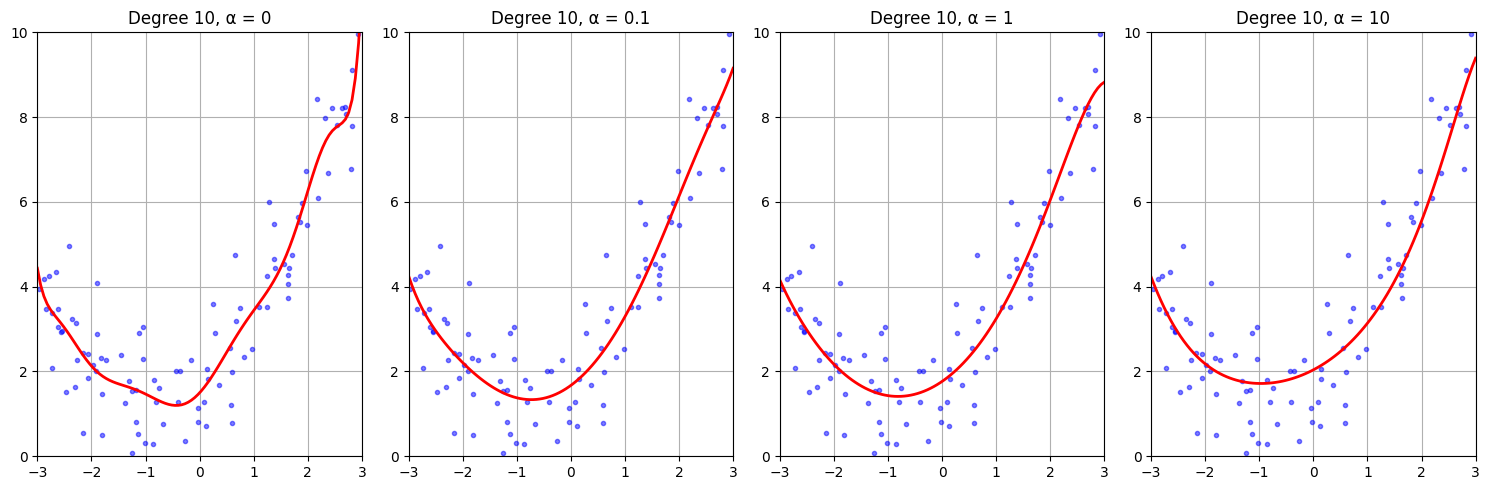

In [5]:
# polynomial regression with ridge regularization

np.random.seed(42)
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1)


def plot_polynomial_ridge(degree, alphas):
    plt.figure(figsize=(15, 5))

    for i, alpha in enumerate(alphas):
        model = Pipeline(
            [
                (
                    "poly_features",
                    PolynomialFeatures(degree=degree, include_bias=False),
                ),
                ("std_scaler", StandardScaler()),
                ("ridge_reg", Ridge(alpha=alpha)),
            ]
        )
        model.fit(X, y)

        # make predictions
        X_new = np.linspace(-3, 3, 100).reshape(-1, 1)
        y_new = model.predict(X_new)

        plt.subplot(1, len(alphas), i + 1)
        plt.plot(X, y, "b.", alpha=0.5)
        plt.plot(X_new, y_new, "r-", linewidth=2)
        plt.title(f"Degree {degree}, α = {alpha}")
        plt.grid(True)
        plt.axis([-3, 3, 0, 10])

    plt.tight_layout()
    plt.show()


plot_polynomial_ridge(degree=10, alphas=[0, 0.1, 1, 10])

What you'll observe:

- α = 0: Severe overfitting (wiggly curve that tries to fit every point)
- α = 0.1: Less overfitting (smoother curve)
- α = 1: Good balance (smooth curve that captures the quadratic pattern)
- α = 10: Underfitting (too flat, misses the pattern)


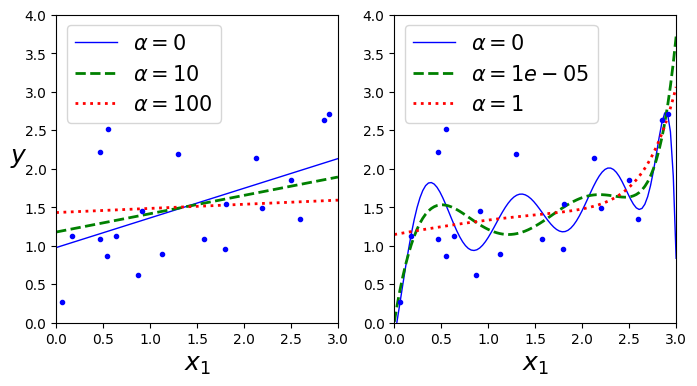

In [ ]:
from sklearn.linear_model import LinearRegression

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)


def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline(
                [
                    (
                        "poly_features",
                        PolynomialFeatures(degree=10, include_bias=False),
                    ),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ]
            )
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(
            X_new,
            y_new_regul,
            style,
            linewidth=lw,
            label=r"$\alpha = {}$".format(alpha),
        )
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])


plt.figure(figsize=(8, 4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()

In above graphs, it shows several Ridge models trained on some linear data using different α values. On the left, plain Ridge models are used, leading to linear predictions. On the right, the data is first expanded using PolynomialFeatures(degree=10), then it is scaled using a StandardScaler, and finally the Ridge models are applied to the resulting features: this is Polynomial Regression with Ridge regularization.

Note how increasing α leads to flatter (i.e., less extreme, more reasonable) predictions, thus reducing the model’s variance but increasing its bias.


### When to Use Ridge Regression

- Multicollinearity: When features are highly correlated
- Many features: When you have more features than samples
- Prevent overfitting: When you want a more robust model
- All features matter: When you believe all features contribute to the outcome


## Ridge Regression: Closed-Form vs GD

### The Closed-Form Solution

Ridge Regression has a mathematical closed-form solution that directly computes the optimal parameters:

`θ̂ = (XᵀX + αA)⁻¹ Xᵀy`

Where:

- X: Feature matrix (with added column of 1s for bias)
- y: Target vector
- α: Regularization strength
- A: Special identity matrix where A₁₁ = 0 (to exclude bias term from regularization)


In [9]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# add bias term (column of 1s)
X_b = np.c_[np.ones((100, 1)), X]  # X_b is now [1, X]


# manual closed-form ridge solution
def ridge_closed_form(X, y, alpha):
    n_features = X.shape[1]
    # create matrix A: identity matrix with 0 in top-left
    A = np.eye(n_features)
    A[0, 0] = 0  # don't regularize bias term

    # compute: θ = (XᵀX + αA)⁻¹ Xᵀy
    XT_X = X.T.dot(X)
    regularization = alpha * A
    theta = np.linalg.inv(XT_X + regularization).dot(X.T).dot(y)
    return theta


# compute using closed-form
alpha = 1.0
theta_manual = ridge_closed_form(X_b, y, alpha)
print("Manual closed-form solution:")
print(f"θ₀ (bias): {theta_manual[0][0]:.6f}")
print(f"θ₁ (weight): {theta_manual[1][0]:.6f}")

# compare with scikit-learn's closed-form (Cholesky decomposition)
ridge_cholesky = Ridge(alpha=alpha, solver="cholesky")
ridge_cholesky.fit(X, y)
print("\nScikit-Learn (Cholesky solver):")
print(f"θ₀ (bias): {ridge_cholesky.intercept_[0]:.6f}")
print(f"θ₁ (weight): {ridge_cholesky.coef_[0]:.6f}")

Manual closed-form solution:
θ₀ (bias): 4.287362
θ₁ (weight): 2.693264

Scikit-Learn (Cholesky solver):
θ₀ (bias): 4.287362
θ₁ (weight): 2.693264


### GD Approach

For large datasets, the closed-form solution can be computationally expensive. Gradient Descent offers an alternative iterative approach.


In [10]:
from sklearn.linear_model import SGDRegressor

# scale the data (crucial for Gradient Descent)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# SGD with L2 penalty (Ridge Regression)
sgd_ridge = SGDRegressor(
    penalty="l2",  # L2 regularization = Ridge
    alpha=alpha / len(X),  # SGD uses different alpha scaling
    max_iter=1000,
    tol=1e-3,
    random_state=42,
)

# SGDRegressor expects 1D array for y
sgd_ridge.fit(X_scaled, y.ravel())

print("\nSGD with L2 penalty (Ridge):")
print(f"θ₀ (bias): {sgd_ridge.intercept_[0]:.6f}")
print(f"θ₁ (weight): {sgd_ridge.coef_[0]:.6f}")

# make predictions
X_new = np.array([[1.5]])
X_new_scaled = scaler.transform(X_new)
y_pred_sgd = sgd_ridge.predict(X_new_scaled)
print(f"Prediction for x=1.5: {y_pred_sgd[0]:.6f}")


SGD with L2 penalty (Ridge):
θ₀ (bias): 6.787361
θ₁ (weight): 1.614658
Prediction for x=1.5: 8.313764


In [11]:
# complete comparision example
from sklearn.model_selection import train_test_split

np.random.seed(42)
X_large = 2 * np.random.rand(1000, 5)  # 1000 samples, 5 features
# create target with some feature importance
y_large = (
    2
    + 3 * X_large[:, 0]
    + 1.5 * X_large[:, 1]
    - 2 * X_large[:, 2]
    + np.random.randn(1000)
)

X_train, X_test, y_train, y_test = train_test_split(
    X_large, y_large, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Method 1: Closed-form Ridge
ridge_cf = Ridge(alpha=1.0, solver="cholesky")
ridge_cf.fit(X_train_scaled, y_train)

# Method 2: SGD Ridge
ridge_sgd = SGDRegressor(
    penalty="l2", alpha=0.001, max_iter=1000, tol=1e-3, random_state=42
)
ridge_sgd.fit(X_train_scaled, y_train)

# Compare results
print("Comparison of Ridge Regression Methods:")
print("\nClosed-form solution:")
print(f"Bias: {ridge_cf.intercept_:.4f}")
print(f"Weights: {ridge_cf.coef_}")
print(f"Test MSE: {mean_squared_error(y_test, ridge_cf.predict(X_test_scaled)):.4f}")

print("\nSGD solution:")
print(f"Bias: {ridge_sgd.intercept_[0]:.4f}")
print(f"Weights: {ridge_sgd.coef_}")
print(f"Test MSE: {mean_squared_error(y_test, ridge_sgd.predict(X_test_scaled)):.4f}")

# Compare predictions
X_sample = X_test_scaled[:3]
print(f"\nSample predictions for first 3 test instances:")
print(f"True values: {y_test[:3]}")
print(f"Closed-form: {ridge_cf.predict(X_sample)}")
print(f"SGD:         {ridge_sgd.predict(X_sample)}")

Comparison of Ridge Regression Methods:

Closed-form solution:
Bias: 4.4053
Weights: [ 1.82957309  0.81267925 -1.13828561 -0.03882699 -0.01146833]
Test MSE: 1.1143

SGD solution:
Bias: 4.4113
Weights: [ 1.8319455   0.82100234 -1.12924759 -0.03170119 -0.01026661]
Test MSE: 1.1095

Sample predictions for first 3 test instances:
True values: [5.26549091 6.88415006 7.90511746]
Closed-form: [4.17627087 6.51949157 6.26879536]
SGD:         [4.16651954 6.52180131 6.28576502]


### When to Use Each Approach

Use Closed-Form When:

- Dataset is small to medium-sized (n < 10,000)
- You need exact solution
- You want simplicity and reproducibility
- All data fits in memory

Use Gradient Descent When:

- Dataset is very large (n > 10,000)
- Data doesn't fit in memory
- You need online learning (streaming data)
- You want to use different loss functions


### Important Note on Alpha Parameter

The `alpha` parameter means different things in different implementations:

- `Ridge(alpha)`: Regularization strength directly
- `SGDRegressor(alpha)`: Regularization strength divided by number of samples

That's why we used `alpha=0.001` for **SGD** when `alpha=1.0` for **closed-form** in the comparison example.
